https://exofop.ipac.caltech.edu/tess/target.php?id=460205581

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl

Tmag = 9.9322 #± 0.006

In [12]:
import lightkurve as lk

#download a tpf using lightkurve package
ticid = 460205581 #random choice
tpf = lk.search_targetpixelfile(f'TIC {ticid}', mission='TESS', sector=10).download()
tpf

/home/jp/miniconda3/envs/py3/lib/python3.7/site-packages/lightkurve/search.py:233: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning)


TessTargetPixelFile(TICID: 460205581)

In [16]:
flux = tpf.flux
time = tpf.time

In [17]:
time.shape, flux.shape

((18085,), (18085, 11, 11))

In [9]:
import sys
sys.path.append('..')
import vinify as vn

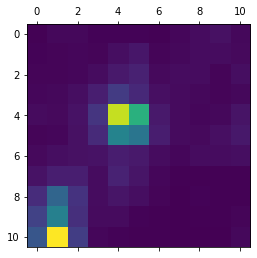

In [53]:
# get a median image from the time-series image data
img = np.nanmedian(flux, axis=0)
pl.matshow(img)

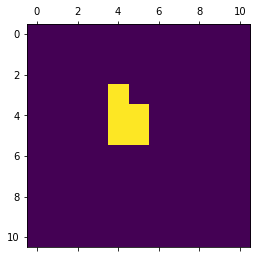

In [54]:
# calculate the max number of pixel used for aperture
area_thresh = vn.determine_area_thresh(Tmag)

# determine pixels for aperture
cx = cy = tpf.shape[1]//2 #choose middle
aperture = vn.determin_aperture(img, (cx, cy), area_thresh=area_thresh)
pl.matshow(aperture)

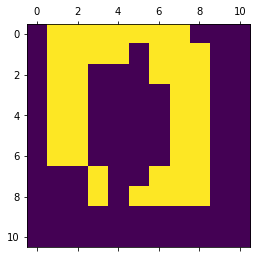

In [58]:
# determine pixels for background
bkg_aperture = vn.make_background(img, (cx, cy), aperture)
pl.matshow(bkg_aperture)

In [61]:
# create time-series iamge data containing only background pixels
bkg_frame = np.where(bkg_aperture == 1, flux, np.nan)
bkg_frame.shape

(18085, 11, 11)

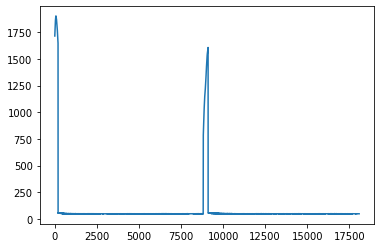

In [66]:
# take the average
bkg_arr = np.nanmean(bkg_frame, axis=(1, 2))
pl.plot(bkg_arr)

In [71]:
calibrated_flux = flux - bkg_arr.reshape((bkg_arr.shape[0], 1, 1))
calibrated_flux.shape

(18085, 11, 11)

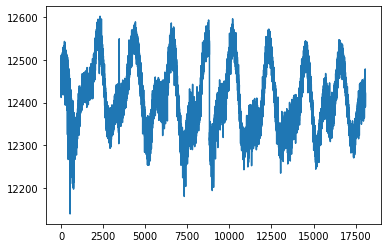

In [73]:
# create the light curve
aperture_frame = np.where(aperture == 1, calibrated_flux, 0)
sap_flux = np.sum(aperture_frame, axis=(1, 2))
pl.plot(sap_flux)